<a href="https://www.kaggle.com/code/rizkynindra/face-expression-recognizer?scriptVersionId=152415151" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

di project kali ini kita akan membuat model klasifikasi untuk membedakan ekspresi wajah dan mengimplementasikannya ke data realtime. Project kali ini kita akan kembali menggunakan dataset berupa gambar, lebih tepatnya gambar wajah manusia. Facial expression recognition adalah teknologi yang menggunakan gesture pada biometrik untuk mendeteksi emosi pada manusia. Emosi yang dideteksi diantaranya happiness, sadness, anger, surprise, fear, and disgust. Dengan facial expression kita bisa mengetahui secara tersirat kondisi dari orang tersebut. Ibaratnya, kita bisa tau kondisinya apakah lagi bahagia, sedih, depresi, dan lain sebagainya. 

Untuk datasetnya sendiri bisa di download melalui link dropbox dengan cara seperti dibawah ini:

In [2]:
!wget https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip

--2023-11-26 15:03:07--  https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/si11cws2pyho1bp/archive.zip [following]
--2023-11-26 15:03:07--  https://www.dropbox.com/s/raw/si11cws2pyho1bp/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb7a23b992f07d5beaf784255ca.dl.dropboxusercontent.com/cd/0/inline/CIRSQAHZAqZFor1vTyacVXgVOer0VVVJ-0uQjkcs9UMZjclLQ39hreEtP9VWmdM4NP5jvn0RB1hvmWSiib-Ih-GSVlqPWeHxwXTIwNsb8CVtjAzBzy8i_VHnG2D7cZ4Ua9gGVjeW8qaDGvOYBLdOFKiz/file# [following]
--2023-11-26 15:03:07--  https://ucb7a23b992f07d5beaf784255ca.dl.dropboxusercontent.com/cd/0/inline/CIRSQAHZAqZFor1vTyacVXgVOer0VVVJ-0uQjkcs9UMZjclLQ39hreEtP9VWmdM4NP5jvn0RB1hvmWSiib-Ih-GSVlqPWeHxwXTIwNsb8

Kalau sudah jangan lupa di unzip supaya datanya bisa terbaca.

In [3]:
!unzip -q "/kaggle/working/archive.zip"

setelah di unzip, maka kalian akan menemukan 2 folder baru yaitu 'train' dan 'test'. Selanjutnya silakan import library "Path" agar kita bisa mengakses isi dari masing - masing folder 'train' dan 'test'

In [4]:
#import required for this project
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [5]:
#creating the pathlib PATH objects
train_path = Path("/kaggle/working/train")
test_path = Path("/kaggle/working/test")

kita coba ambil sampel dari folder 'train' dan bisa kalian lihat isi dari datasetnya berupa gambar dengan format .jpg. Selanjutnya kita ambil label dari masing - masing gambar yang mewakili. Kalau kalian perhatikan, labelnya adalah nama folder sebelum file gambarnya. Untuk mengambil labelnya, silakan buat fungsi seperti dibawah ini. Oh ya, hasilnya mungkin akan berbeda - beda setiap kali kalian jalankan scriptnya, tapi itu ga jadi masalah selama scriptnya tetap berjalan.

In [6]:
#Getting Image paths
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x), train_image_paths))

train_image_paths[:10]

['/kaggle/working/train/angry/Training_77512365.jpg',
 '/kaggle/working/train/angry/Training_59169722.jpg',
 '/kaggle/working/train/angry/Training_75072404.jpg',
 '/kaggle/working/train/angry/Training_4469188.jpg',
 '/kaggle/working/train/angry/Training_18699711.jpg',
 '/kaggle/working/train/angry/Training_10345473.jpg',
 '/kaggle/working/train/angry/Training_94904202.jpg',
 '/kaggle/working/train/angry/Training_78795166.jpg',
 '/kaggle/working/train/angry/Training_63666713.jpg',
 '/kaggle/working/train/angry/Training_93032281.jpg']

In [7]:
# get their respective labels

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x), train_image_paths))
train_image_labels[:10]

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry']

Setelah kita tahu labelnya, langsung kita konversi labelnya menjadi angka dengan menggunakan LabelEncoder. Hal ini dilakukan karena deep learning tidak bisa memproses atau membaca label yang berbentuk string.

In [8]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Setelah kalian jalankan script diatas, maka akan menunjukkan angka yang mewakili masing - masing label. Karena kita memiliki 7 label dan perhitungan dimulai dari angka 0. Maka hasil dari label encodernya kurang lebih seperti ini:

angry : 0
disgust : 1
fear : 2
happy : 3
neutral : 4
sad : 5
surprise : 6

In [9]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)
train_image_labels[:10]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Karena dataset ini tidak memiliki validation data, selanjutnya kita bagi training datanya agar sebagian bisa digunakan untuk validation data. Disini saya ambil sebanyak 25% (0.25) untuk validation datanya.

In [10]:
from sklearn.model_selection import train_test_split

Train_paths, Val_paths, Train_labels, val_labels = train_test_split(train_image_paths, train_image_labels, test_size=0.25)

Oh ya, karena project ini kategorinya *multi-class classifier* , kita lakukan pengecekan untuk imbalance classnya. Hal ini bertujuan untuk melihat apakah ada kelas yang terlalu dominan dari kelas yang lainnya. Caranya, kita hitung weight dari setiap kelas yang ada. Silakan copy script dibawah ini untuk lebih jelasnya.

In [11]:
# compute class weights

classTotals = Train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e, weight in enumerate(classWeight)}
print(class_weight)

{0: 1.7998002, 1: 16.937304, 2: 1.7738017, 3: 1.0, 4: 1.4301218, 5: 1.4966758, 6: 2.2768648}


Seperti yang terlihat pada gambar, class 1 memiliki weight yang cukup jauh dari class yang lainnya. 

In [12]:
#function used for transformation

def load(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [13]:
#define Image size and batch size

IMG_SIZE = 96
BATCH_SIZE = 32

#Basic transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

#Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])

In [14]:
#function used to create a tensorflow data object

AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)
    
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    
    dataset = dataset.map(lambda image, label : load(image, label))
    dataset = dataset.map(lambda image, label : (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)
    
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        
    dataset = dataset.repeat()
    return dataset

In [15]:
#creating train dataset object and verifying it
train_dataset = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

(32, 96, 96, 3)
(32, 7)


happy


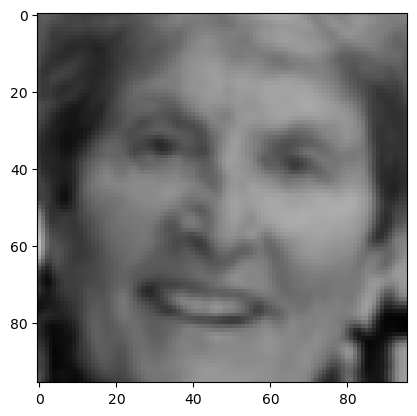

In [16]:
#view a sample of training image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96,96,3))

In [17]:
%time val_dataset = get_dataset(Val_paths, val_labels, train = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 27.9 ms, sys: 1.14 ms, total: 29 ms
Wall time: 28.4 ms
(32, 96, 96, 3)
(32, 7)


In [18]:
#building efficientNet model
from tensorflow.keras.applications import EfficientNetV2B2

backbone = EfficientNetV2B2(
    input_shape=(96,96,3),
    include_top=False)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

35839040/35839040 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 3, 3, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 128)               180352    
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                       

In [19]:
#compiling your model by providing the optimizer, loss and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

In [20]:
#Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/10


2023-11-26 15:04:08.060304: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetv2-b2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


672/672 [==============================] - 146s 100ms/step - loss: 2.8248 - accuracy: 0.3889 - precision: 0.6442 - recall: 0.1715 - val_loss: 1.3586 - val_accuracy: 0.4916 - val_precision: 0.7191 - val_recall: 0.2532
Epoch 2/10
672/672 [==============================] - 65s 96ms/step - loss: 2.3932 - accuracy: 0.4813 - precision: 0.6870 - recall: 0.2746 - val_loss: 1.2072 - val_accuracy: 0.5412 - val_precision: 0.7125 - val_recall: 0.3662
Epoch 3/10
672/672 [==============================] - 65s 96ms/step - loss: 2.2703 - accuracy: 0.5060 - precision: 0.6919 - recall: 0.3110 - val_loss: 1.1918 - val_accuracy: 0.5474 - val_precision: 0.7667 - val_recall: 0.3232
Epoch 4/10
672/672 [==============================] - 64s 95ms/step - loss: 2.1912 - accuracy: 0.5202 - precision: 0.6947 - recall: 0.3286 - val_loss: 1.1711 - val_accuracy: 0.5437 - val_precision: 0.6986 - val_recall: 0.3676
Epoch 5/10
672/672 [==============================] - 64s 95ms/step - loss: 2.0955 - accuracy: 0.5434 - p

In [21]:
model.layers[0].trainable = False

In [22]:
#Defining our callbacks

checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weight.h5", verbose=1, save_best_only=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 3, 3, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 128)               180352    
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 8,950,629
Trainable params: 181,255
Non-

In [24]:
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    callbacks=[checkpoint, early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
    class_weight = class_weight
)

Epoch 1/10
672/672 [==============================] - ETA: 0s - loss: 1.8181 - accuracy: 0.5991 - precision: 0.7306 - recall: 0.4421
Epoch 1: val_loss improved from inf to 1.10511, saving model to best_weight.h5
672/672 [==============================] - 64s 95ms/step - loss: 1.8181 - accuracy: 0.5991 - precision: 0.7306 - recall: 0.4421 - val_loss: 1.1051 - val_accuracy: 0.5954 - val_precision: 0.7068 - val_recall: 0.4679
Epoch 2/10
672/672 [==============================] - ETA: 0s - loss: 1.7730 - accuracy: 0.6058 - precision: 0.7385 - recall: 0.4548
Epoch 2: val_loss improved from 1.10511 to 1.06137, saving model to best_weight.h5
672/672 [==============================] - 64s 95ms/step - loss: 1.7730 - accuracy: 0.6058 - precision: 0.7385 - recall: 0.4548 - val_loss: 1.0614 - val_accuracy: 0.6037 - val_precision: 0.7324 - val_recall: 0.4632
Epoch 3/10
672/672 [==============================] - ETA: 0s - loss: 1.7153 - accuracy: 0.6191 - precision: 0.7443 - recall: 0.4719
Epoch 3: 

In [25]:
import keras

print(keras.__version__)
print(tf.__version__)

2.12.0
2.12.0


In [26]:
# model.load_weights("best_weight.h5")

In [27]:
#create a dataset object for 'testing' set 

test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x), test_image_paths))
test_labels = list(map(lambda x : get_label(x), test_image_paths))

test_labels = Le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [96,96], method="bilinear")
    return image, label

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

In [28]:
#verify test dataset object
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 96, 96, 3)
(32, 7)


angry


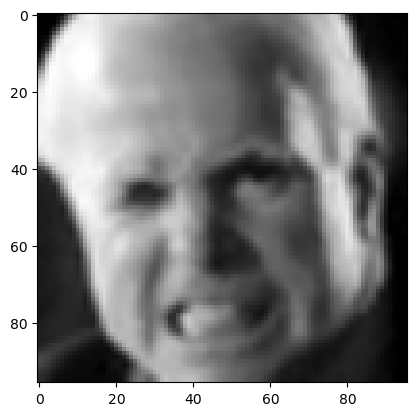

In [29]:
#view a sample validation image

print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(96, 96, 3))

In [30]:
# evaluating the loaded model

loss, acc, prec, rec = model.evaluate(test_dataset)

print("Testing Accuracy:", acc)
print("Testing Precision:", prec)
print("Testing Recall:", rec)

225/225 [==============================] - 5s 22ms/step - loss: 1.0182 - accuracy: 0.6336 - precision: 0.7276 - recall: 0.5318
Testing Accuracy: 0.6336026787757874
Testing Precision: 0.7276020050048828
Testing Recall: 0.5317637324333191


In [31]:
model.save("FacialExpressionModel.h5")

In [32]:
#save label encoder

import pickle

def save_object(obj, name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [33]:
save_object(Le, "LabelEncoder")